# 4. Multi_variable linear regression

In [2]:
from tqdm import tqdm_notebook
import tensorflow as tf


# 1. Muli_variable linear regression

### prediction exam score

- regression using three inputs(x1, x2, x3)

Hypothesis

$$ H(x) = Wx + b $$
$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$

Cost function

$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$
$$ cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x1^{(i)}, x2^{(i)}, x3^{(i)} )-y^{(i)})^2 $$

In [23]:
tf.set_random_seed(777)

# data set
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')


hypothesis = x1* w1 + w2 * w1 + x3 * w3 + b
print(hypothesis)  #내부적으로 새로운 노드를 연결해서 (추가)해서 학습함
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)


Tensor("add_22:0", dtype=float32)


In [14]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val , _ = sess.run([cost, hypothesis, train],
                                   feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 9321.1826171875 
Prediction :
[67.56626 80.09638 78.83894 90.92409 57.1614 ]

Step : 1 
Cost : 4691.34228515625 
Prediction :
[ 91.740814 110.52045  108.11304  123.00176   80.503174]

Step : 2 
Cost : 2363.72412109375 
Prediction :
[108.881035 132.09189  128.86908  145.74564   97.052986]

Step : 3 
Cost : 1193.4686279296875 
Prediction :
[121.03423 147.38715 143.58617 161.87218 108.78762]

Step : 4 
Cost : 605.080078125 
Prediction :
[129.65161 158.23254 154.02155 173.30692 117.10829]

Step : 5 
Cost : 309.23968505859375 
Prediction :
[135.76196 165.92278 161.42104 181.415   123.00832]

Step : 6 
Cost : 160.4890899658203 
Prediction :
[140.09468 171.37582 166.66792 187.16429 127.19201]

Step : 7 
Cost : 85.69593811035156 
Prediction :
[143.16693 175.24252 170.3884  191.24097 130.15868]

Step : 8 
Cost : 48.0886344909668 
Prediction :
[145.34543 177.98438 173.02657 194.13165 132.26237]

Step : 9 
Cost : 29.1788330078125 
Prediction :
[146.89015 179.92863 174.89726 196.

## 2. Multi-variable matmul linear regression

> Hypothesis using matrix
$$ w1 x1 + w2 x2 + w3 x3 + ... + wn xn $$

$$ [x{1} x{2} x{3}] \times \begin{bmatrix} w{1}\ w{2}\ w{3}

> \end{bmatrix}
[x_1 w_1 + x_2 w_2 + x_3 w_3] $$

$$H(X) = XW$$


In [24]:
# x에 따른 w 변수의 개수를 많이 만들지 않아도 가능

import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# 변수의 개수를 여러개 만들지 않아도 가능 -> x, y의 shape맞추어야 함.
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [25]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


Step : 0 
Cost : 84022.6171875 
Prediction :
[[ -98.76324 ]
 [-129.1354  ]
 [-121.624306]
 [-134.46591 ]
 [ -99.58831 ]]

Step : 1 
Cost : 26351.775390625 
Prediction :
[[14.422761]
 [ 6.909154]
 [12.420941]
 [11.506196]
 [ 4.180112]]

Step : 2 
Cost : 8275.0146484375 
Prediction :
[[77.79065 ]
 [83.07608 ]
 [87.46772 ]
 [93.23047 ]
 [62.276962]]

Step : 3 
Cost : 2608.905029296875 
Prediction :
[[113.26719 ]
 [125.719666]
 [129.4834  ]
 [138.9847  ]
 [ 94.80397 ]]

Step : 4 
Cost : 832.87158203125 
Prediction :
[[133.12842]
 [149.59482]
 [153.0062 ]
 [164.60065]
 [113.01536]]

Step : 5 
Cost : 276.17156982421875 
Prediction :
[[144.24718]
 [162.96217]
 [166.1755 ]
 [178.9419 ]
 [123.21197]]

Step : 6 
Cost : 101.66780853271484 
Prediction :
[[150.47134]
 [170.44661]
 [173.54822]
 [186.97086]
 [128.92139]]

Step : 7 
Cost : 46.961875915527344 
Prediction :
[[153.95525]
 [174.63742]
 [177.67574]
 [191.4658 ]
 [132.11859]]

Step : 8 
Cost : 29.806350708007812 
Prediction :
[[155.90495]


## 3. File input linear regression

- Loading data File

In [29]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

xy = np.loadtxt('data/data-01-test-score.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')


# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [31]:
#Lunch the graphh  in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict ={X: x_data, Y: y_data})
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        


Step : 0 
Cost : 24700.72265625 
Prediction :
[[ 1.2699044]
 [10.017089 ]
 [ 5.3647304]
 [ 7.6310306]
 [ 8.236796 ]
 [ 9.749408 ]
 [ 5.930961 ]
 [ 4.46919  ]
 [13.477244 ]
 [17.144417 ]
 [ 6.408031 ]
 [10.726584 ]
 [ 3.8850625]
 [ 1.2374375]
 [ 7.418155 ]
 [11.074962 ]
 [ 1.6429932]
 [ 6.3120456]
 [ 2.1118195]
 [ 1.277427 ]
 [ 7.5684657]
 [10.57437  ]
 [ 5.9860034]
 [-2.6355674]
 [ 8.22737  ]]

Step : 1 
Cost : 9142.439453125 
Prediction :
[[59.17228 ]
 [79.60789 ]
 [73.935005]
 [82.308876]
 [61.310806]
 [48.877823]
 [61.83008 ]
 [45.909664]
 [78.51375 ]
 [77.38296 ]
 [60.263588]
 [63.828033]
 [74.72799 ]
 [60.129032]
 [63.5738  ]
 [81.69312 ]
 [57.729187]
 [73.3968  ]
 [69.65087 ]
 [61.70898 ]
 [73.11883 ]
 [75.85966 ]
 [68.48344 ]
 [55.744686]
 [80.35076 ]]

Step : 2 
Cost : 3390.1083984375 
Prediction :
[[ 94.380516]
 [121.92238 ]
 [115.62951 ]
 [127.717   ]
 [ 93.58216 ]
 [ 72.66932 ]
 [ 95.81983 ]
 [ 71.10793 ]
 [118.05862 ]
 [114.01011 ]
 [ 93.01057 ]
 [ 96.115974]
 [117.8045  ]

 [191.86423]]

Step : 1200 
Cost : 10.324675559997559 
Prediction :
[[150.36023]
 [186.66536]
 [180.7537 ]
 [198.36087]
 [142.5598 ]
 [108.04738]
 [148.99341]
 [111.01404]
 [177.63261]
 [168.34111]
 [143.7722 ]
 [144.9395 ]
 [185.32869]
 [152.30028]
 [150.72687]
 [190.29816]
 [145.06252]
 [178.41331]
 [175.52898]
 [156.66869]
 [175.06712]
 [176.18224]
 [165.9787 ]
 [148.26364]
 [191.83437]]

Step : 1300 
Cost : 10.053807258605957 
Prediction :
[[150.44829 ]
 [186.60478 ]
 [180.7811  ]
 [198.37476 ]
 [142.4854  ]
 [107.94838 ]
 [149.02673 ]
 [111.075745]
 [177.51787 ]
 [168.18463 ]
 [143.77109 ]
 [144.85881 ]
 [185.37032 ]
 [152.34637 ]
 [150.73372 ]
 [190.23688 ]
 [145.07413 ]
 [178.48186 ]
 [175.59683 ]
 [156.7445  ]
 [175.08801 ]
 [176.12051 ]
 [166.01724 ]
 [148.3845  ]
 [191.8052  ]]

Step : 1400 
Cost : 9.801552772521973 
Prediction :
[[150.53311]
 [186.54613]
 [180.80733]
 [198.38824]
 [142.41313]
 [107.85307]
 [149.05948]
 [111.13645]
 [177.40738]
 [168.03462]
 [143.77022]
 [144

In [32]:
# Launch the graph in a session.
# sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.global_variables_initializer())# 변수 초기화 안하면-> 4000번 학습 한 결과가 됨.

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        # print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))

Step : 0 	Cost : 8.607675552368164 
Step : 1 	Cost : 8.60608196258545 
Step : 2 	Cost : 8.604462623596191 
Step : 3 	Cost : 8.602865219116211 
Step : 4 	Cost : 8.601276397705078 
Step : 5 	Cost : 8.599686622619629 
Step : 6 	Cost : 8.598084449768066 
Step : 7 	Cost : 8.596487045288086 
Step : 8 	Cost : 8.594901084899902 
Step : 9 	Cost : 8.593306541442871 
Step : 100 	Cost : 8.452879905700684 
Step : 200 	Cost : 8.308319091796875 
Step : 300 	Cost : 8.173196792602539 
Step : 400 	Cost : 8.04690170288086 
Step : 500 	Cost : 7.928780555725098 
Step : 600 	Cost : 7.818299770355225 
Step : 700 	Cost : 7.714881420135498 
Step : 800 	Cost : 7.6180500984191895 
Step : 900 	Cost : 7.527389049530029 
Step : 1000 	Cost : 7.442434787750244 
Step : 1100 	Cost : 7.362819671630859 
Step : 1200 	Cost : 7.2881693840026855 
Step : 1300 	Cost : 7.218160629272461 
Step : 1400 	Cost : 7.152468681335449 
Step : 1500 	Cost : 7.090813159942627 
Step : 1600 	Cost : 7.032930850982666 
Step : 1700 	Cost : 6.978

- prediction

In [34]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[191.2904]]


In [35]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[179.8336 ]
 [174.10446]]


## Ex04. TF reader linear regression 5¶

참조 : https://www.tensorflow.org/programmers_guide/reading_data

In [37]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader() 
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the decoded result.
# Convert CSV records to tensors. Each column maps to one tensor.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults) # 데이터를 텐서 형태로 변환

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

W0911 11:02:54.187481  2396 deprecation.py:323] From <ipython-input-37-80cf1f25dbb8>:6: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:02:54.199203  2396 deprecation.py:323] From C:\Python\Anaconda3\lib\site-packages\tensorflow\python\training\input.py:278: input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
W0911 11:02:54.202131  239

In [39]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()  # 좌표계
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
Cost_val = []

for step in tqdm_notebook(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)


Step : 0 
Cost : 341.5231018066406 
Prediction :
[[143.32368]
 [166.74939]
 [167.34601]
 [179.39067]
 [128.23233]
 [ 89.61351]
 [131.67331]
 [ 94.10205]
 [151.13309]
 [133.25743]]

Step : 1 
Cost : 100.0609130859375 
Prediction :
[[133.89035]
 [128.53712]
 [183.22253]
 [156.05069]
 [137.12808]
 [174.5272 ]
 [150.38373]
 [164.56947]
 [175.9792 ]
 [157.56711]]

Step : 2 
Cost : 88.00960540771484 
Prediction :
[[164.2063 ]
 [163.62335]
 [157.84053]
 [159.60732]
 [185.58348]
 [151.81682]
 [176.96762]
 [177.40858]
 [190.35352]
 [136.02472]]

Step : 3 
Cost : 96.20046997070312 
Prediction :
[[ 96.978676]
 [142.18433 ]
 [101.898865]
 [163.3698  ]
 [144.6033  ]
 [138.28401 ]
 [132.87167 ]
 [188.9967  ]
 [160.84795 ]
 [141.71132 ]]

Step : 4 
Cost : 86.31586456298828 
Prediction :
[[182.52696]
 [156.71867]
 [172.16983]
 [183.6151 ]
 [164.3992 ]
 [168.98267]
 [168.38185]
 [162.39276]
 [163.8454 ]
 [190.83456]]

Step : 5 
Cost : 55.44389724731445 
Prediction :
[[156.64783 ]
 [182.78555 ]
 [183.1

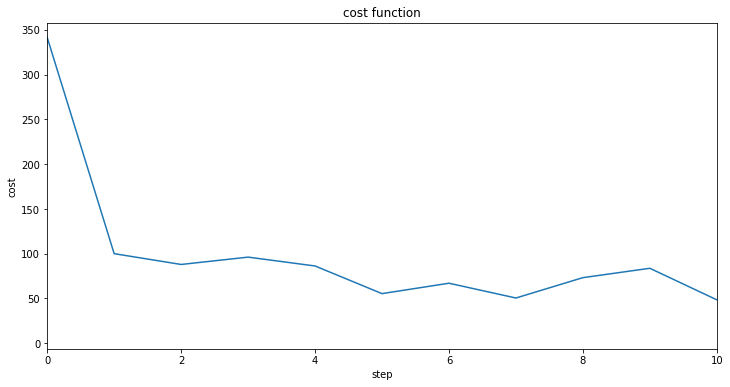

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

- prediction

In [42]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[181.05669]]


In [43]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[155.32312]
 [185.53555]]
